# Assignment 2
In this assignment, we will be covering Linear Regression with polynomial feature combinations and regularization. The beginning of this assignment should look familiar (because it was taken from the LinearRegression.ipynb), but we will be expanding upon these ideas in the second half of this notebook. Refer to the LinearRegression video for more detials on the LinearRegression.ipynb code. please start from there before you start this assignment.

In [44]:
# importing modules

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [45]:
# loading data
# If you have not already, you will need to create a folder named data for your data file
# Or you can just change the path below to your desired path

path = os.getcwd() + '\\OneDrive\桌面\Assignment_2\data\linearRegression.csv'
data = pd.read_csv(path, header=None, names=['GranulesDiameter', 'BeachSlope'])
data.head()

,GranulesDiameter,BeachSlope
0,0.170,0.63
1,0.190,0.70
2,0.220,0.82
3,0.235,0.88
4,0.235,1.15


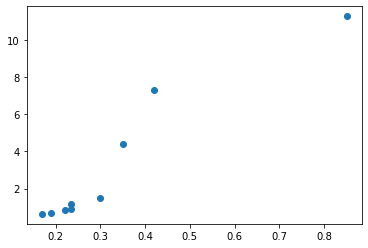

In [46]:
# PLot of data

plt.scatter(data.values[:, 0], data.values[:, 1])

In [47]:
# add column of ones for bias term (this is used later in the regression pipeline)
data['ones'] = np.ones(data.shape[0])

# split data into input (x) and target (y) values
x = data[["GranulesDiameter", "ones"]].values
y = data["BeachSlope"].values

print(data)

   GranulesDiameter  BeachSlope  ones
0             0.170        0.63   1.0
1             0.190        0.70   1.0
2             0.220        0.82   1.0
3             0.235        0.88   1.0
4             0.235        1.15   1.0
5             0.300        1.50   1.0
6             0.350        4.40   1.0
7             0.420        7.30   1.0
8             0.850       11.30   1.0


In [48]:
# build and fit sklearn LinearRegression model
clf = LinearRegression(fit_intercept=False)
clf.fit(x, y)

LinearRegression(fit_intercept=False)

In [49]:
# access coefficients and mean squared error
theta = clf.coef_
mse = mean_squared_error(clf.predict(x), y)

print("Optimal theta:", theta)
print("Cost", mse)

# output should be:
# Optimal theta: [17.1593689  -2.47592505]
# Cost 1.1423147748040037

Optimal theta: [17.1593689  -2.47592505]
Cost 1.1423147748040035


In [50]:
def calcVectorizedCost(x, y, theta):
    
    """
    Caculating cost metric as mean squared error (MSE)
    
    x: independent variable
    y: dependent variable
    theta: current weights (coefficients) for regression
    """
    
    error = x.dot(theta) - y
    return error.dot(error) / len(x)
    
    
def gradientDescent(x, y, thetaInit, eta, epochs):
    
    """
    Caculating gradients and updating thetas through gradient descent loop
    
    x: independent variable
    y: dependent variable
    thetaInit: current weights (coefficients) for regression
    eta: learning rate
    epochs: number of steps for updating theta
    """
    
    # copy theta and initialize losses
    theta = np.copy(thetaInit)
    losses = []
    losses.append(calcVectorizedCost(x, y, theta))
    
    # run gradient descent loop
    for i in range(epochs):
        gradient = 2 * (x.T.dot(x.dot(theta) - y)) / x.shape[0]
        theta -= eta * gradient
        losses.append(calcVectorizedCost(x, y, theta))

    return theta, losses    

In [51]:
thetaInit = np.zeros(x.shape[1])
eta = 0.1
epochs = 1000

theta, losses = gradientDescent(x, y, thetaInit, eta, epochs)

print("Optimal theta:", theta)
print("Cost", losses[-1])
print(x.shape[0])

# Output should be SIMILAR TO OR SAME AS the cost and theta from previous step

Optimal theta: [17.14629046 -2.47145051]
Cost 1.142321549619812
9


In [52]:
def predict(theta, x):
    return x.dot(theta)
    
    
def plot_SinpleLinearRegression_line(theta, x):
    
    """
    Plotting regression line for simple linear regression
    """
    
    # find min and max values
    min_x = np.min(x[:, 0])
    max_x = np.max(x[:, 0])
        
    # access model's prediction at those points and plot
    y_vals = predict(theta, np.array([[min_x, 1], [max_x, 1]]))
    plt.plot([min_x, max_x], y_vals, 'r')

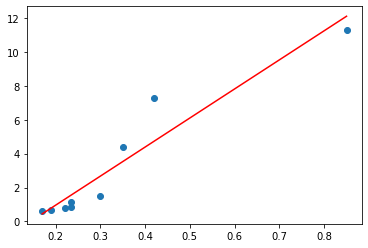

In [53]:
# plot of data and regression line

plt.scatter(x[:, 0], y)
plot_SinpleLinearRegression_line(theta, x)

# Assignment 2 Questions
Now it is your turn to apply some of the regression concepts covered in class. Below we will be first transforming our features with PolynomialFeatures from sklearn. Once we have done this transformation, you will then fit this new data. Once the data is fit, we will analyze the effects of regularization on our new polynomial fit. Each Question worth <b>14 Points</b> + 2 extra points for all.

<Strong>Q1)</Strong> Import PolynomialFeatures from sklearn. Next, you will need to create a PolynomialFeatures object <b>(with the degree hyperparam set to 5)</b> which we will denote as the variable "poly". Then we will transform our data using this object that we have created. Use the docs to assist you with understanding and implementing https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [54]:
from sklearn.preprocessing import PolynomialFeatures # Add import
x = x[:,0].reshape(9,1)
poly = PolynomialFeatures(5, include_bias=True) # create sklearn PolynomialFeatures Object with degree=5
polynomial_x = poly.fit_transform(x) # fit your data using this object
np.shape(polynomial_x)
# Check to make sure that your polynomial_x is shape (9, 6)

(9, 6)

<Strong>Q2)</Strong> What does PolynomialFeatures allow us to do to our data? and why might we want to make this transformation? 

In [ ]:
# PolynomialFeatures allows us to deal with non-linear data by an improved linear regression, which is called polynomial
# regression by adding powers of each features. Since it's common that we meet complex model and non-linear data which 
# is hard to be solved by plain linear regression, we need to improve linear regression to fit this kind of data.

<Strong>Q3)</Strong> Lets perform gradient decent with our new data. Fill in values for thetaInit (Note: we must have the correct diminsions of thetas for our new data), eta (use 0.25), and epochs (use 500,000). This may take some time to run because we are performing a large amount of iterations.

In [55]:
thetaInit = np.zeros(polynomial_x.shape[1]) # theta initialization
eta = 0.25 # learning rate
epochs =500000 # iterations
#print(polynomial_x, y)
theta, losses = gradientDescent(polynomial_x, y, thetaInit, eta, epochs)

In [56]:
def predict(theta, x):
    return x.dot(theta)

def plot_SimpleNonlinearRegression_line(theta, x, poly):

    """
    Plotting regression line for nonlinear regression
    """
    
    # find min and max values
    min_x = np.min(x[:, 0])
    max_x = np.max(x[:, 0])
    
    # get range of data to transform and make predictions on
    min_max_range = np.linspace(min_x, max_x, 100)
    min_max_range_and_bias = np.vstack((min_max_range, np.ones(min_max_range.shape[0]))).T
    polynomial_min_max_range = poly.fit_transform(min_max_range.reshape(-1, 1))

    # access model's prediction at those points and plot
    y_vals = predict(theta, polynomial_min_max_range)
    plt.plot(min_max_range, y_vals)

[   6.13139843  -55.98739042  134.81507037   54.40031874  -52.88463569
 -113.69139403] [[0.17      ]
 [0.19      ]
 [0.22      ]
 [0.235     ]
 [0.235     ]
 [0.30000001]
 [0.34999999]
 [0.41999999]
 [0.85000002]] [ 0.63        0.69999999  0.81999999  0.88        1.14999998  1.5
  4.4000001   7.30000019 11.30000019]


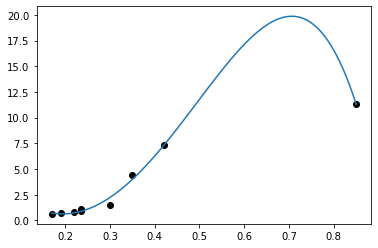

In [57]:
# plot of data and regression line

plt.scatter(x[:, 0], y, c="k")
plot_SimpleNonlinearRegression_line(theta, x, poly)
print(theta, x, y)

<Strong>Q4)</Strong> Do you think this fit/regression line is a good model for our data compared to the linear model above? Why? Do you believe we end up with overfitting? suggest away to reduce the overfitting if it exists (no code needed)?

In [ ]:
# Yes, this line is better than that above since the cost is reduced to minumum, however, it ends up with overfitting
# since it matches the trainning data so well and might get an issue when fitting testing data. 
# The way to reduce overfitting is to using regression and adding regularization term into the cost function

<Strong>Q5)</Strong> In this question we need to add the regularization term to the gradient descent algorithm. Finish the calcVectorizedCostR and the gradientDescentR functions to do so. Make sure to add the proper ridge regularization terms. Hint: Use the Cost and Gradient Descent functions above as baselines. Also, check your notes on ridge regression regularization.

In [60]:
def calcVectorizedCostR(x, y, theta, alpha):
    
    """
    Caculating cost metric as mean squared error (MSE) with regularization
    
    x: independent variable
    y: dependent variable
    theta: current weights (coefficients) for regression
    alpha: regularization term
    """
    
    # add your code here for cost with regularization
    error = x.dot(theta) - y
    cost = error.dot(error) / len(x)
    reg = alpha * theta.dot(theta) / 2
    return cost + reg
    
def gradientDescentR(x, y, thetaInit, eta, epochs, alpha):
    
    """
    Caculating gradients and updating thetas through gradient descent loop with regularization
    
    x: independent variable
    y: dependent variable
    thetaInit: current weights (coefficients) for regression
    eta: learning rate
    epochs: number of steps for updating theta
    alpha: regularization term
    """

    theta = np.copy(thetaInit)
    losses = []
    losses.append(calcVectorizedCostR(x, y, theta, alpha))
    
    for i in range(epochs):
        # add your code here for gradient decent with regularization
        gradient = (2 * (x.T.dot(x.dot(theta) - y)) / x.shape[0]) + alpha * theta
        theta -= eta * gradient
        losses.append(calcVectorizedCostR(x, y, theta, alpha))

    return theta, losses    

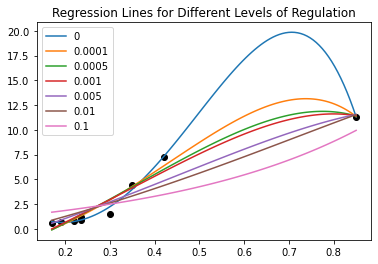

In [64]:
# Hyperparam initialization
thetaInit = np.zeros(polynomial_x.shape[1])
eta = 0.25
epochs = 500_000
alpha_values = [0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]


# Initializing plot
plt.title("Regression Lines for Different Levels of Regulation")
plt.scatter(x[:, 0], y, c='k')

# iterating over different alpha values (This is going to take a while)
for i in alpha_values:
    theta, losses = gradientDescentR(polynomial_x, y, thetaInit, eta, epochs, i)
    plot_SimpleNonlinearRegression_line(theta, x, poly)
    
plt.legend(alpha_values)
plt.show()

<Strong>Q6)</Strong> Explain the observed regularization effect.

In [ ]:
# Comparing with the line of alpha=0 which causes overfitting, the line becomes flatter and with less curves when
# alpha value is increasing. Even though the lines with regularization don't fit the points very well, it's common that
# some errors exist. However, the proper alpha value should not be too big, for example, when alpha=0.1, the line is
# much flatter and obviously doesn't fit some of point well, which will cause an more serious error than others. 

<Strong>Q7)</Strong> Which regularization value produces the best fit? Why?

In [ ]:
# When alpha=0.001 it produces the best fit since it doesn't try to go over all the points and is flatter. Also, 
# this regularization helps to reduce the cost to a acceptable minimum.
# alpha=0.0001 could be a better fit comparing with others. 